# 1. Flowchart

In [20]:
a = int(input("输入a："))
b = int(input("输入b："))
c = int(input("输入c："))

def Print_values(a,b,c):
    if a>b:
        if b>c:
            print(a+b-10*c)
        else:
            if a>c:
                print(a+c-10*b)
            else:
                print(c+a-10*b)
    else:
        if b>c:
            print("无输出")
        else:
            print(c+b-10*a)

Print_values(a,b,c)

输入a： 10
输入b： 5
输入c： 1


5


#### When a = 10, b = 5, c = 1, my output is 5.

# 2. Continuous ceiling function 

In [4]:
import math
import numpy as np
n = int(input("要计算多少个正整数的函数值："))
arr = np.linspace(1, n, n)
print(arr)
memo = { }  #define a dictionary to store the computerd F(x) values.

def F(x):
    if x == 1:
        return 1
    if x in memo:
        return memo[x]
    result = F(math.ceil(x/3)) + 2*x
    memo[x] = result  #store the result for future reference
    return result

def compute_F(list):
    return [F(x) for x in list]

results = compute_F(arr)
print(results)

要计算多少个正整数的函数值： 7


[1. 2. 3. 4. 5. 6. 7.]
[1, 5.0, 7.0, 13.0, 15.0, 17.0, 21.0]


#### Here, I input n = 7.

# 3. Dice rolling

In [32]:
def find_number_of_ways(n, s):  
    # n: 骰子的数量, s: 目标和  
    min_sum = n  # 目标数最小总和 (n个 1)  
    max_sum = 6 * n  # 目标数最大总和 (n个 6)  
    
    # 如果目标和不在可达到的范围内，返回 0  
    if s < min_sum or s > max_sum:  
        return 0  
    
    # dp[i] 表示使用 n 个骰子得到总和为 i 的方式数  
    ways = [[0] * (s + 1) for _ in range(n + 1)]  
    
    # 初始化：0 个骰子和为 0 的情况  
    ways[0][0] = 1  
    
    # 进行迭代每个骰子  
    for i in range(1, n + 1):  # 对每个骰子  
        for j in range(i, s + 1):  # 当投掷 i个骰子时，和最小为 i，遍历和从 i 到 s 的情况  
            # 累加每个骰子的面可能产生的结果  
            for k in range(1, 7):  # 每个骰子可能的面  
                if j - k >= 0:  
                    ways[i][j] += ways[i - 1][j - k]  # 当前骰子的结果 dp[i - 1][j - k] 表示在使用 i - 1 个骰子时，想要得到和为 j - k 的方法数。这意味着，如果我们加上当前骰子的结果 k，我们就可以得到和为 j 的方式  

    return ways[n][s]  

# 计算从 10 到 60 所有和的方式数量  
def count_all_ways(n):  
    maximum_sum = 6 * n  
    Number_of_ways = {}  #定义一个字典存储所有的目标和及其方法数量

    for s in range(n, maximum_sum + 1):  # 从 n 到 6n  
        Number_of_ways[s] = find_number_of_ways(n, s)   

    max_value = max(Number_of_ways.values())    #获得字典中最大的方法数量
    max_target = [key for key, value in Number_of_ways.items() if value == max_value] #获得字典中最大的方法数量对应的目标和
    
    return Number_of_ways, max_target, max_value  


n = 10  # 投掷 10 个骰子  
Number_of_ways, max_target, max_value = count_all_ways(n)  
print(Number_of_ways)  # 输出目标和方式数字典  
print(max_target, max_value)  # 输出最大数量和对应的目标数  

# 特殊情况测试  
#print(find_number_of_ways(n, 10))  # 输出方法数量，对于目标和为10

{10: 1, 11: 10, 12: 55, 13: 220, 14: 715, 15: 2002, 16: 4995, 17: 11340, 18: 23760, 19: 46420, 20: 85228, 21: 147940, 22: 243925, 23: 383470, 24: 576565, 25: 831204, 26: 1151370, 27: 1535040, 28: 1972630, 29: 2446300, 30: 2930455, 31: 3393610, 32: 3801535, 33: 4121260, 34: 4325310, 35: 4395456, 36: 4325310, 37: 4121260, 38: 3801535, 39: 3393610, 40: 2930455, 41: 2446300, 42: 1972630, 43: 1535040, 44: 1151370, 45: 831204, 46: 576565, 47: 383470, 48: 243925, 49: 147940, 50: 85228, 51: 46420, 52: 23760, 53: 11340, 54: 4995, 55: 2002, 56: 715, 57: 220, 58: 55, 59: 10, 60: 1}
[35] 4395456


#### When x = 35, there are the maximum of the Number_of ways. The maximum of the Number_of ways is 4395456.

# 4. Dynamic programming

### code 1
该题的图像绘制部分我请教了李东宸同学

[7.0, 19.5, 35.0, 71.25, 161.2, 388.50000000000006, 562.4285714285713, 1306.875, 3406.666666666664, 4296.5999999999985, 10979.36363636364, 12967.500000000045, 35284.30769230765, 95957.57142857138, 155097.13333333327, 434169.37499999715, 686195.2352941144, 1412659.5000000098, 2621435.000000012, 4456443.750000059]


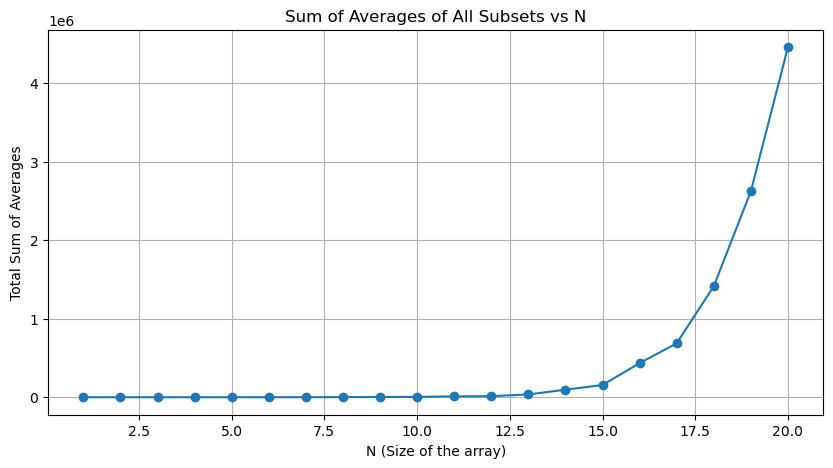

In [47]:
import random  
from itertools import combinations   
import matplotlib.pyplot as plt   
# 使用 Jupyter Notebook 的默认绘图模式（inline 模式）
%matplotlib inline
def random_integer(N):  
    return [random.randint(0, 10) for _ in range(N)]  # 生成 N个 0-10范围内的随机整数  

def sum_averages(arr):  # 计算在给定数组的所有非空子集的平均值之和   
    ave_sum = 0  
    count = 0  
    
    # 遍历所有的非空子集  
    for r in range(1, len(arr) + 1):  
        for subset in combinations(arr, r):  # 用于生成数组中大小为 r 的所有组合（子集）  
            avg = sum(subset) / len(subset)  # 计算当前子集的平均值  
            ave_sum += avg  
            count += 1  
            
    return ave_sum  

N_values = list(range(1, 21))  # 从 1 到 100  
Total_sum_averages = []  

for N in N_values:  
    random_array = random_integer(N)  # 生成随机数组  
    total_sum = sum_averages(random_array)  # 计算所有子集的平均值的总和  
    Total_sum_averages.append(total_sum)  # 将结果添加到列表中  
print(Total_sum_averages)  

# 绘制结果  
plt.figure(figsize=(10, 5))  
plt.plot(N_values, Total_sum_averages, marker='o')  
plt.title('Sum of Averages of All Subsets vs N')  
plt.xlabel('N (Size of the array)')  
plt.ylabel('Total Sum of Averages')  
plt.grid()  
plt.show()  

### code 2
以上代码是通过遍历所有的非空子集来计算每个子集的平均值并求和，计算过程复杂，计算缓慢，故以上代码只计算了 N = 21 个元素时子集均值和，N = 100时运行无结果。请教尹自豪后，他指出以上代码迭代较复杂，应进行优化。在查阅相关材料后，对代码进行修改优化如下。

[3.0, 7.0, 21.333333333333332, 30.0, 86.4, 85.33333333333333, 438.85714285714283, 832.0, 1280.0, 2406.4, 4561.454545454545, 9386.666666666666, 22370.46153846154, 41545.142857142855, 90658.13333333333, 145408.0, 354665.4117647059, 662641.7777777778, 1131358.3157894737, 3224371.2, 4094439.619047619, 11915636.363636363, 17141938.086956523, 39146837.333333336, 61740154.88, 147123278.76923078, 308203671.7037037, 752577974.8571428, 1082998219.0344827, 2738041651.2, 5507256452.129032, 10066329600.0, 23557244865.939392, 41181157014.588234, 85899345920.0, 207112867384.8889, 343597383680.0, 647409807144.421, 1473063655161.4358, 2968681394995.2, 4934393646604.488, 13874789588601.904, 23217594372572.277, 44980021136290.91, 116890302828452.98, 165213573286689.4, 326391196398526.6, 747667906887680.0, 1332697848915759.0, 2826008766174986.0, 5872340690590941.0, 1.138891059613885e+16, 2.0393658689979604e+16, 4.036559666013556e+16, 7.860828440501229e+16, 2.071655828590428e+17, 3.527029602909104e+17, 6.7

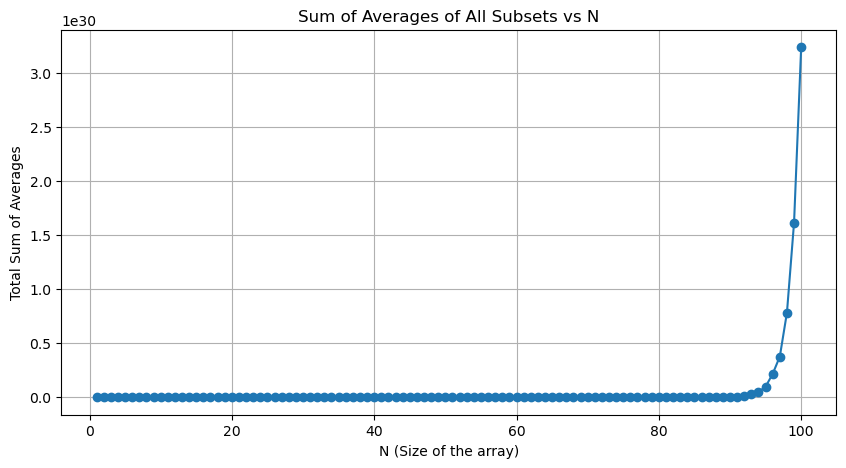

In [45]:
import random  
import matplotlib.pyplot as plt  

# 使用 Jupyter Notebook 的默认绘图模式（inline 模式）  
%matplotlib inline                                       

def random_integer(N):  
    return [random.randint(0, 10) for _ in range(N)]  # 生成 N个 0-10范围内的随机整数  

def sum_averages(arr):  
    total = sum(arr)  
    n = len(arr)  
    
    # 每个元素的贡献  
    # 每个元素出现的子集数是 2^(n-1)，所以总子集数除以元素个数  
    return total * (2**(n-1)) / n  # 每个元素的贡献情况  

N_values = list(range(1, 101))  # 从 1 到 20  
Total_sum_averages = []  

for N in N_values:  
    random_array = random_integer(N)  # 生成随机数组  
    total_sum = sum_averages(random_array)  # 计算所有子集的平均值的总和  
    Total_sum_averages.append(total_sum)  # 将结果添加到列表中  

print(Total_sum_averages)  

# 绘制结果  
plt.figure(figsize=(10, 5))  
plt.plot(N_values, Total_sum_averages, marker='o')  
plt.title('Sum of Averages of All Subsets vs N')  
plt.xlabel('N (Size of the array)')  
plt.ylabel('Total Sum of Averages')  
plt.grid()  
plt.show()

#### As N becomes larger, the sum of subsets in the array gradually increase, and the growth rate also gradually increase.

# 5. Path counting

In [40]:
import random  
import numpy as np  

#创建一个 N 行 M 列的矩阵，右下和左上角填充 1 其他随机填充 0 或 1  
def create_matrix(N, M):  
    matrix = np.random.randint(0, 2, size=(N, M))  # 生成随机 0 和 1 的矩阵  
    matrix[0][0] = 1  # 左上角设置为 1  
    matrix[N-1][M-1] = 1  # 右下角设置为 1  
    return matrix  
#matrix = create_matrix(10,8)
#print(matrix)

#计算从左上角到右下角的路径数量  
def count_paths(matrix):  
    N, M = matrix.shape  # 获取矩阵的行数和列数  
    dp = np.zeros((N, M), dtype=int)  # 创建一个与输入矩阵同样大小的 dp 矩阵，矩阵中的值含义为到该点的总路径数量  

    # 只有起始点和终点可以为 1, 开始计算路径  
    dp[0][0] = 1  # 路径起始点为 1 

    # 填充 dp 矩阵  
    for i in range(N):  
        for j in range(M):  
            if matrix[i][j] == 1:  # 只有值为 1 的点才能通过  
                if i > 0:  # 若有上方走来的路径  
                    dp[i][j] += dp[i-1][j]  
                if j > 0:  # 从有左边走来的路径  
                    dp[i][j] += dp[i][j-1]  
    #return dp, dp[N-1][M-1]
    return dp[N-1][M-1]  # 返回到达右下角的路径数  

#dp, a = count_paths(matrix)
#print(dp)
#print(a)

#运行 Count_path 1000 次并计算路径数量的均值  
def run_count_paths(N, M, runs):  
    path_counts = []  
    for _ in range(runs):  
        matrix = create_matrix(N, M)  # 生成新的随机矩阵  
        path_count = count_paths(matrix)  # 计算路径数量  
        path_counts.append(path_count)  # 添加到路径计数列表中  
    return np.mean(path_counts)  # 返回路径数量的均值  

 
mean_path_count = run_count_paths(10, 8, 1000)  
print(f"Mean number of paths from (0,0) to ({10-1},{8-1}): {mean_path_count}")

Mean number of paths from (0,0) to (9,7): 0.281


#### The mean of total number of paths from the 100 runs is 0.281